In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn



In [6]:
print(sklearn.__version__)

1.6.0


In [3]:
df = pd.read_csv('housing_price_dataset.csv')

In [4]:
df.sample(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
5225,1117,5,1,Urban,1967,150812.016422
35321,2562,2,2,Urban,2018,237766.162880
3504,1086,4,1,Rural,1981,183383.569244
31376,2874,4,2,Suburb,1955,335518.109762
40782,2547,3,3,Rural,1953,302257.136976


In [5]:
df.shape

(50000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [7]:

df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [8]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: >

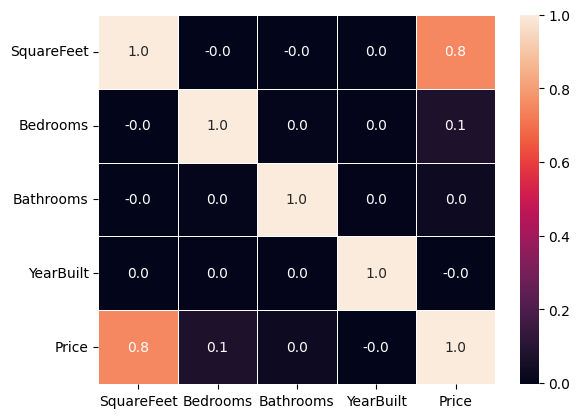

In [10]:
df.corr(numeric_only=True)['Price']
sns.heatmap(data=df.corr(numeric_only=True), annot=True,fmt=".1f", linewidth=.5)

# EDA

## Uni-Variant Analysis
### Categorical Data

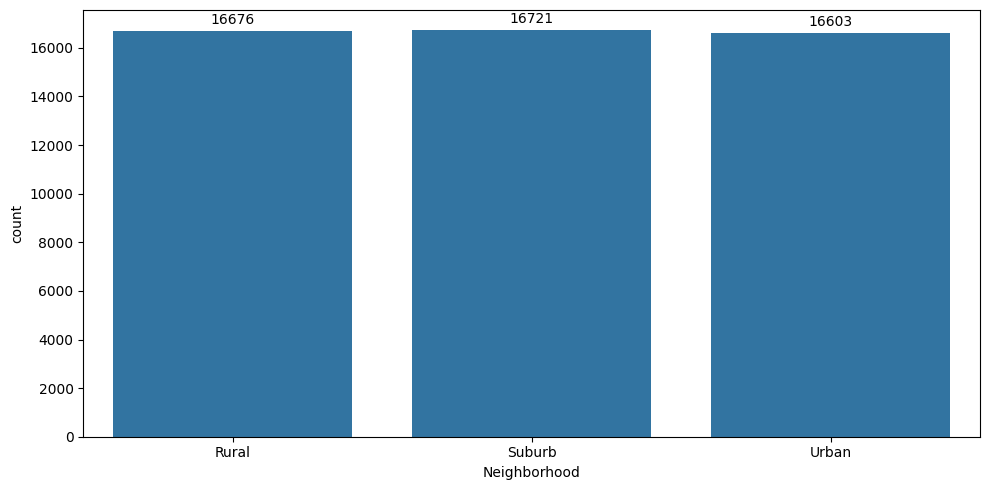

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Neighborhood', data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

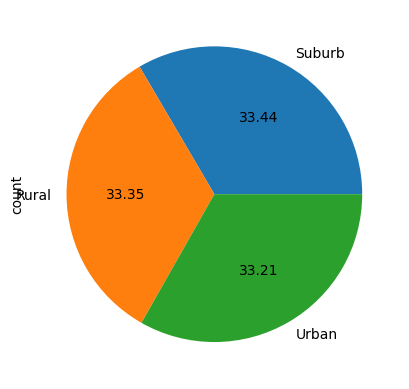

In [12]:
df['Neighborhood'].value_counts().plot(kind='pie',autopct='%0.2f')

### Numerical Data (Continues)

In [13]:
df['SquareFeet'].describe()

count    50000.000000
mean      2006.374680
std        575.513241
min       1000.000000
25%       1513.000000
50%       2007.000000
75%       2506.000000
max       2999.000000
Name: SquareFeet, dtype: float64

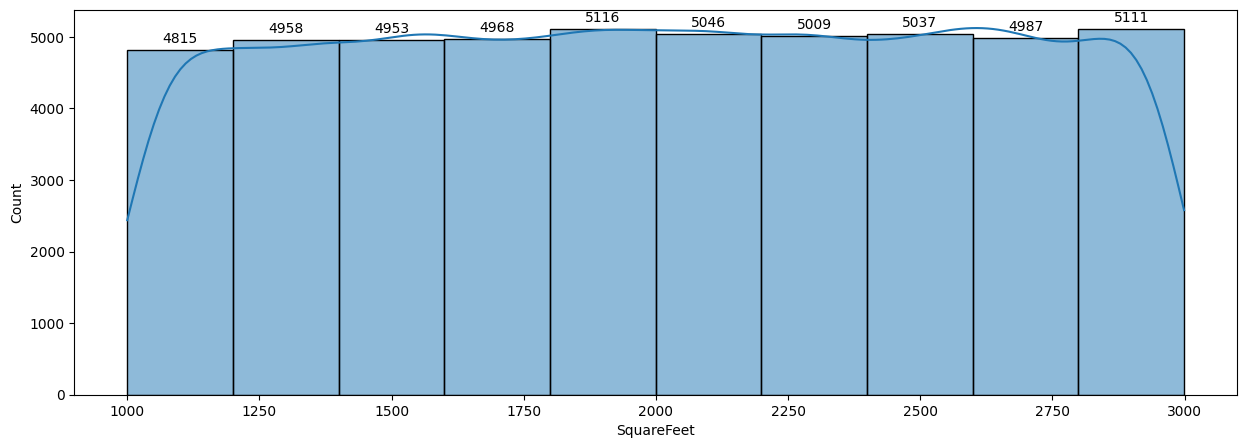

In [14]:

plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, bins=10, x='SquareFeet',kde=True)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

<Axes: xlabel='SquareFeet'>

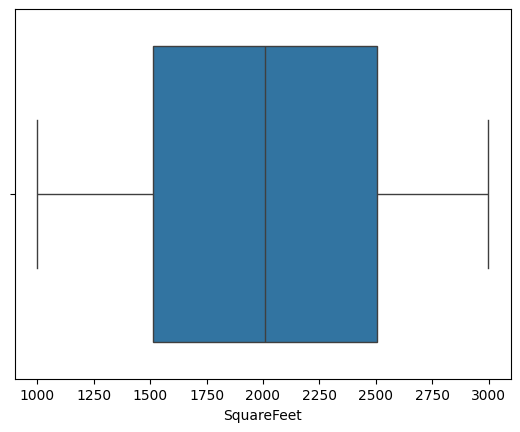

In [15]:
sns.boxplot(x=df["SquareFeet"])

In [16]:
df['SquareFeet'].skew()

np.float64(-0.011161817099369262)

### Numerical Data (Descrete)

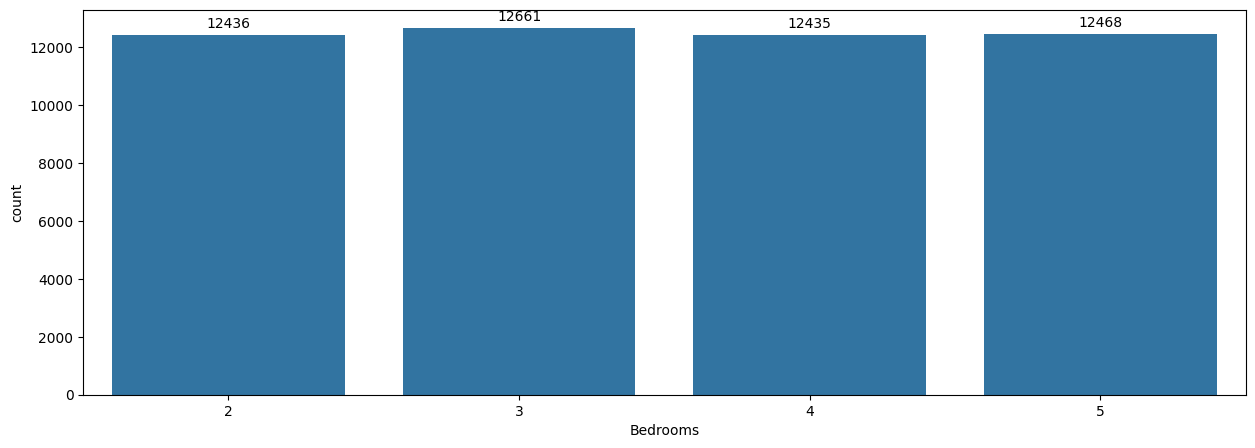

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Bedrooms')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

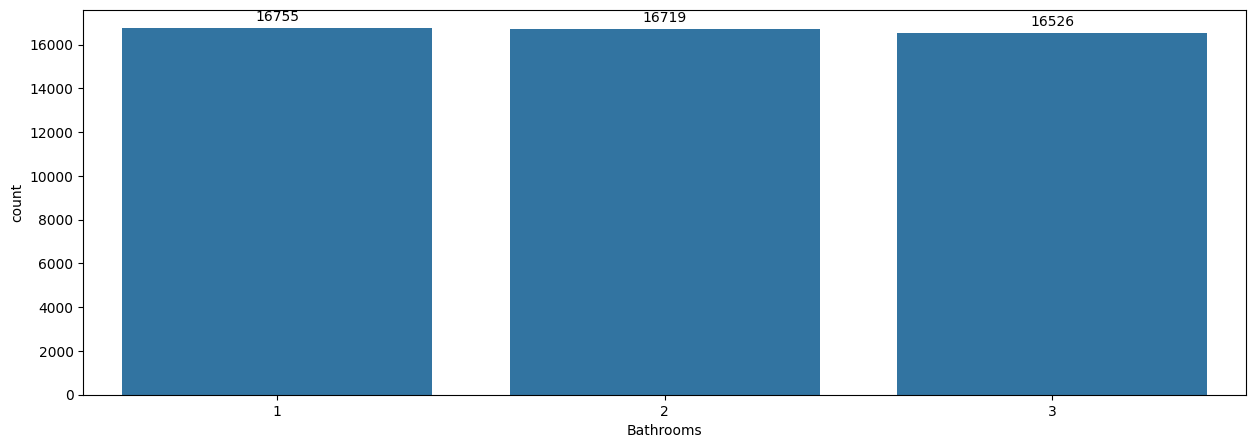

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='Bathrooms')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

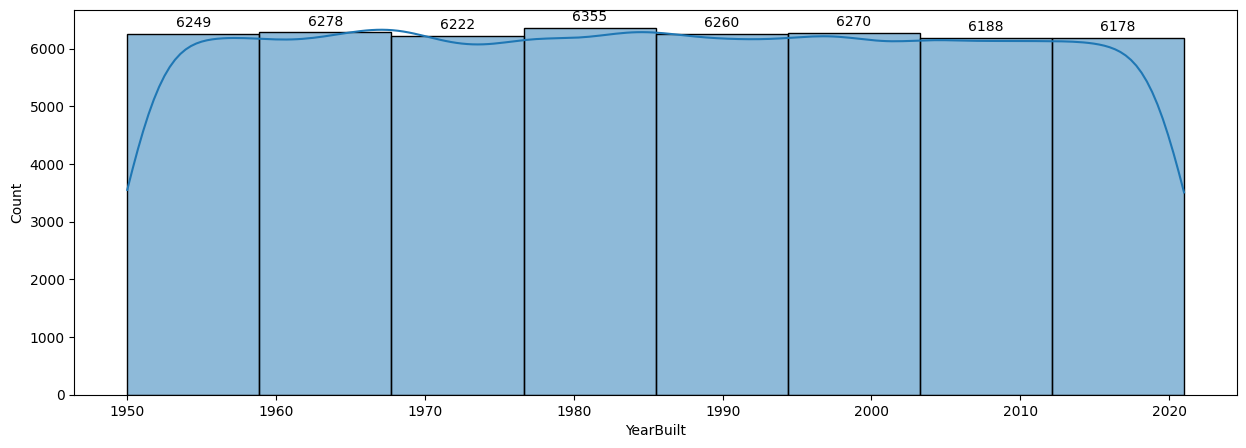

In [19]:


plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, bins=8, x='YearBuilt',kde=True)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

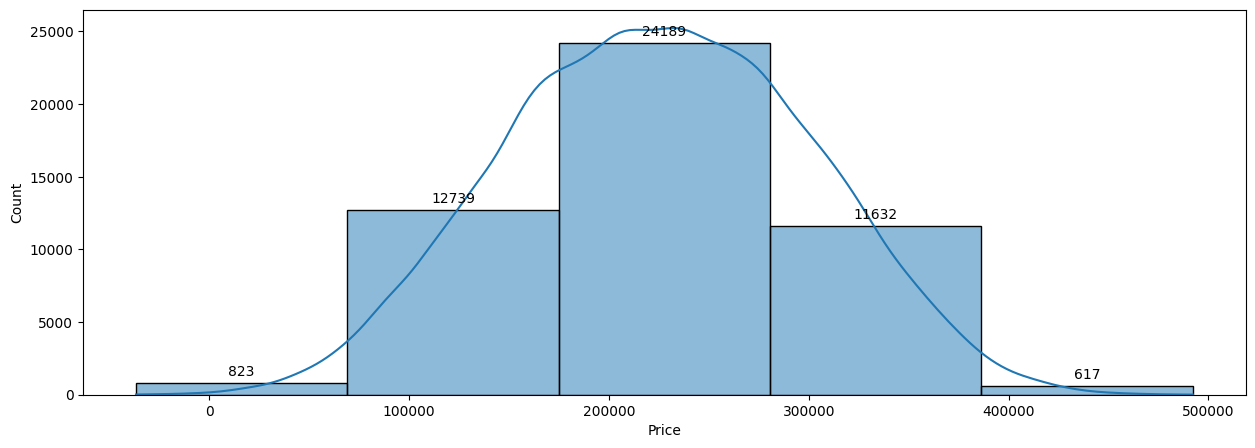

In [20]:

plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, bins=5, x='Price',kde=True)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',label_type='edge',padding=3)

In [21]:
df['Price'].skew()

np.float64(-0.008250544772666662)

In [22]:
df["Price"].kurtosis()

np.float64(-0.4080077388829926)

<Axes: >

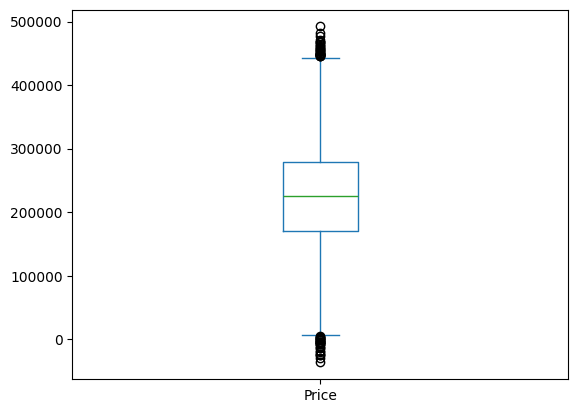

In [23]:
df['Price'].plot(kind='box')

## Bivariate Analysis
### Numerical - Numerical

In [24]:
df.sample(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
22042,1758,2,2,Urban,2009,208691.228331
31262,1773,2,1,Rural,2015,323592.989948
2138,1824,4,3,Urban,1982,220069.155533
9613,2018,4,3,Suburb,2005,311967.392506
43313,1652,5,1,Urban,1955,211503.996527


<Axes: xlabel='SquareFeet', ylabel='Price'>

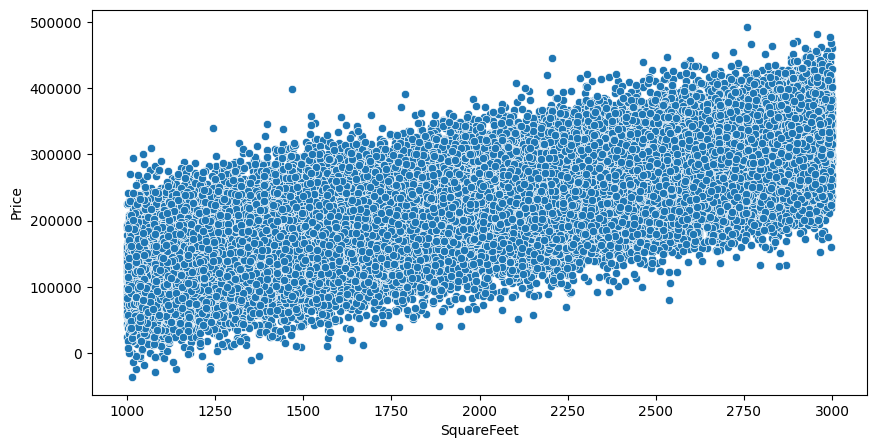

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="SquareFeet", y="Price", data=df)  # Continuous vs Price


<Axes: xlabel='Bedrooms', ylabel='Price'>

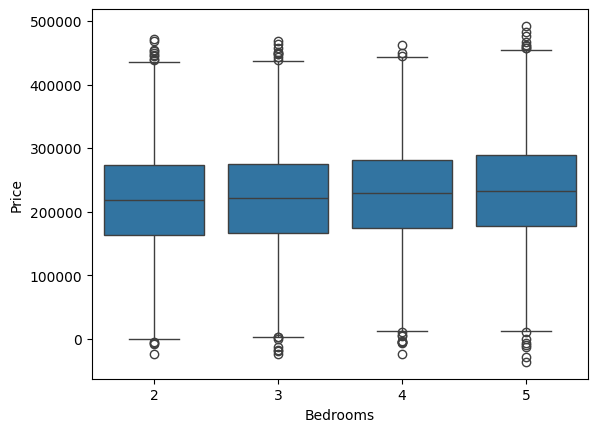

In [26]:
sns.boxplot(x="Bedrooms", y="Price", data=df)        # Discrete vs Price

<Axes: xlabel='Neighborhood', ylabel='Price'>

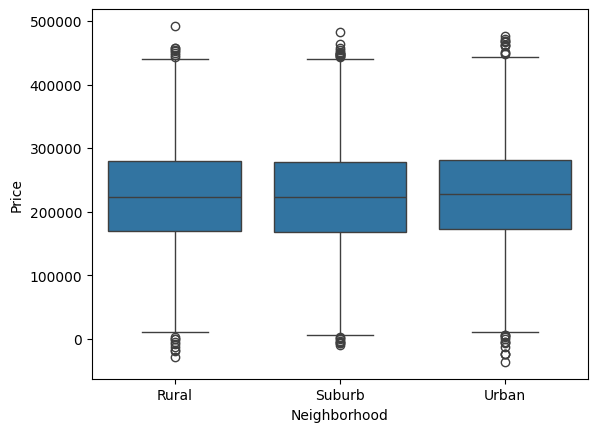

In [27]:
sns.boxplot(x="Neighborhood", y="Price", data=df)    # Categorical vs Price

## Feature Engg.
### Feature Scaling



In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns=['Price']),df['Price'],test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, dtype=np.int32), ['Neighborhood']),
    ('num', MinMaxScaler(), ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt'])
], remainder='passthrough')

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

feature_selector = SelectKBest(score_func=f_regression, k=5)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Create Pipeline

In [32]:
from sklearn.pipeline import Pipeline,make_pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('model', model)
])

In [33]:
#ytrain = np.array(ytrain).ravel()

In [34]:
ytrain

39087    288178.195769
30893    374155.921378
45278    242571.549240
16398    150048.317779
13653    241134.908315
             ...      
11284    324396.846219
44732    319266.944411
38158    248092.662727
860      132414.177622
15795    288751.049986
Name: Price, Length: 40000, dtype: float64

In [35]:
ytrain = np.array(ytrain).astype(int).ravel()  # Convert to 1D integer array
ytest = np.array(ytest).astype(int).ravel()  # Convert to 1D integer array


In [36]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                sparse_output=False),
                                                  ['Neighborhood']),
                                                 ('num', MinMaxScaler(),
                                                  ['SquareFeet', 'Bedrooms',
                                                   'Bathrooms',
                                                   'YearBuilt'])])),
                ('feature_selector',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x000001BE70A54400>)),
                ('model', LinearRegression())])

In [37]:
yreds = pipe.predict(xtest)
yreds

array([218269.82778652, 134894.39134328, 255137.04732493, ...,
       310645.30038003, 200798.56711201, 244058.51186449])

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#mse = mean_squared_error(ytests, ypred)
r2 = r2_score(yreds, ytest)

In [39]:
r2

0.2653366602460152

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, df.drop('Price', axis=1), df['Price'], cv=5, scoring='r2')
print("CV Mean R2:", scores.mean())


CV Mean R2: 0.570116925703626


In [41]:
xtrain

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
39087,2498,2,3,Rural,2021
30893,2380,5,3,Urban,1977
45278,2274,5,2,Urban,1957
16398,2215,5,1,Suburb,1977
13653,2078,2,3,Suburb,1962
...,...,...,...,...,...
11284,2166,5,3,Suburb,1996
44732,2463,4,1,Urban,1953
38158,2812,4,2,Urban,2010
860,2188,3,1,Urban,1979


## Exporting the Pipeline

In [42]:
# Export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))